<a href="https://colab.research.google.com/github/Carmodann1311/IA_Calidadypreparacion/blob/main/DIABETES_EXPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

aqui importamos las librerias que se van a utilizar

In [ ]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

aqui estamos importando el conjunto de datos de diabetes en csv

In [ ]:
data = pd.read_csv("/content/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


la informacion de nuestro conjunto de datos

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


 En este DataFrame resultante, los valores serán True si el valor correspondiente en data es NaN (Not a Number, utilizado para representar valores faltantes o nulos), y False si no lo es.

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 Este código crea un gráfico de barras que cuenta las observaciones de una categoría específica en el DataFrame

<Axes: xlabel='Outcome', ylabel='count'>

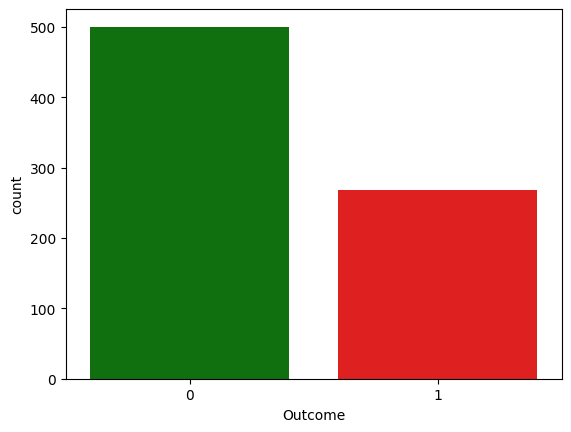

In [ ]:
sns.countplot(x='Outcome',data=data,palette=['g','r'])

Este código está preparando el conjunto de datos para un modelo

In [ ]:
X = data.drop('Outcome',axis=1)
y = data['Outcome']

se usa para dividir un conjunto de datos en conjuntos de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,
                                                    test_size=0.2,stratify=y)

verificar la distribución de las clases en el conjunto de entrenamiento

In [ ]:
y_train.value_counts()

Outcome
0    400
1    214
Name: count, dtype: int64

s abordar el desbalanceo de clases en los datos, tanto en el conjunto de entrenamiento como en el conjunto de prueba.

In [ ]:
smote = SMOTE(random_state=0)

X_train, y_train = smote.fit_resample(X_train,y_train)
X_test, y_test = smote.fit_resample(X_test,y_test)

 es verificar la distribución de las clases en el conjunto de entrenamiento.

In [ ]:
y_train.value_counts()

Outcome
0    400
1    400
Name: count, dtype: int64

 inicializar un modelo de regresión logística que luego se puede entrenar con datos y usar para hacer predicciones.

In [ ]:
model_LR = LogisticRegression()

luego se puede entrenar con datos y usar para hacer predicciones

In [ ]:
model_XGB = XGBClassifier()

clasificación de Bosques Aleatorios que luego se puede entrenar con datos y usar para hacer predicciones.

In [ ]:
model_RFC = RandomForestClassifier()

 Vamos a desglosar este código para entender qué hace y cuál es su propósito.

In [ ]:
model_SVM = SVC()

Una vez que se han evaluado los diferentes modelos utilizando métricas de evaluación (precisión, recall, F1-score), estas listas contendrán los resultados de cada algoritmo

In [ ]:
alg = ['LogisticRegression','SVC','RandomForestClassifier','XGBoostClaassifier']
acc = []
rec= []
F1 = []

 entrena un modelo de clasificación dado, hace predicciones en el conjunto de prueba, calcula y almacena las métricas de evaluación

In [ ]:
def evaluate(model):
  model.fit(X_train,y_train)
  pre = model.predict(X_test)
  accuracy = accuracy_score(pre,y_test)
  recall = recall_score(pre,y_test)
  f1 = f1_score(pre,y_test)

  acc.append(accuracy)
  rec.append(recall)
  F1.append(f1)

  sns.heatmap(confusion_matrix(pre,y_test),annot=True)
  print(model)
  print('Accuracy : ',accuracy,'Recall : ',recall,"F1 : ",f1)

 muestra una matriz de confusión junto con el modelo y las métricas de evaluación.

LogisticRegression()
Accuracy :  0.755 Recall :  0.7575757575757576 F1 :  0.7537688442211055


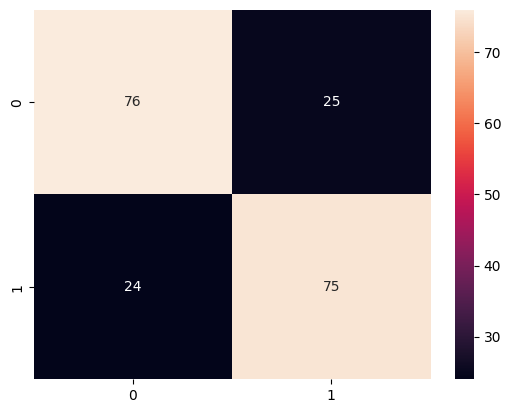

In [ ]:
evaluate(model_LR)

Aqui hay otra muestra

SVC()
Accuracy :  0.685 Recall :  0.6907216494845361 F1 :  0.6802030456852791


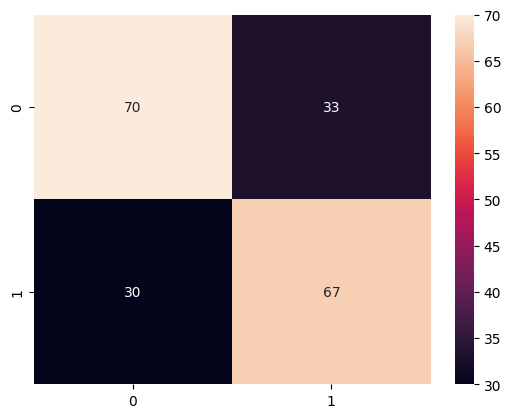

In [ ]:
evaluate(model_SVM)

otra muestra

RandomForestClassifier()
Accuracy :  0.78 Recall :  0.7745098039215687 F1 :  0.7821782178217823


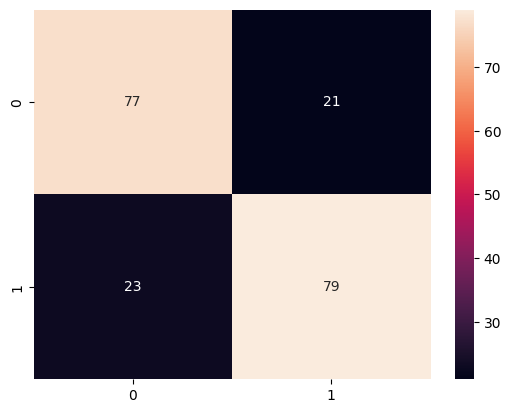

In [ ]:
evaluate(model_RFC)

otra muestra

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy :  0.755 Recall :  0.7684210526315789 F1 :  0.7487179487179486


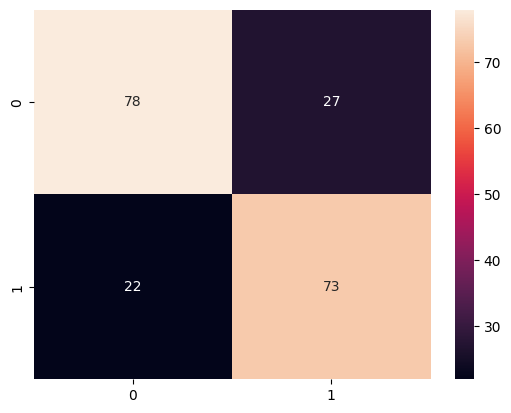

In [ ]:
evaluate(model_XGB)

 En resumen los resultados de evaluación de varios algoritmos de clasificación, mostrando sus valores de precisión, recall y puntuación F1. Esto proporciona una manera conveniente de comparar el rendimiento de los diferentes modelos en un solo lugar.

In [ ]:
final_result = pd.DataFrame({"Algorithm":alg ,'Accuarcy':acc,"recall":rec,"F1_score":F1})
final_result

,Algorithm,Accuarcy,recall,F1_score
0,LogisticRegression,0.755,0.757576,0.753769
1,SVC,0.685,0.690722,0.680203
2,RandomForestClassifier,0.780,0.774510,0.782178
3,XGBoostClaassifier,0.755,0.768421,0.748718
